# 프로젝트 : 나랑 닮은 연예인을 찾아보자

# <목차>

### 1. 필요한 모듈 import하기
### 2. 사진 모으기
### 3. 사진들이 들어있는 디렉토리 경로,사진 목록 확인
### 4. 얼굴영역 자르기
### 5. 얼굴 영역의 임베딩 추출하기
### 6. 연예인 사진과 비교하기 전 내사진 2장으로 먼저 비교해보기
### 7. 연예인 사진으로 닮은꼴 찾기
### 8. 다양한 재미있는 시각화 시도해 보기


# 1. 필요한 모듈 import하기

In [206]:
import face_recognition
import os
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as img
import face_recognition as fr
import numpy as np

# 2. 사진 모으기

# 3. 사진들이 들어있는 디렉토리 경로,사진 목록 확인

file_list: ['로제.jpg', '아이즈원민주.jpg', '손흥민.jpg', '러블리즈지수.jpeg', '야마다 타카유키.jpeg', 'RM.jpg', '손나은.jpeg', '김종서.jpg', '조이.jpg', '레인보우재경.jpg', '트와이스사나.jpg', '배성우.png', '브래들리 쿠퍼.jpg', '벤 에플렉.jpeg', '리암 니슨.png', '잇지유나.jpg', '박용택.jpg', '안재홍.jpg', 'nct도영.jpeg', '스윙스.jpeg', '이준혁.jpeg', '카이.jpg', '온앤오프효진.jpg', '서현진.jpg', '솔라.jpg', '이승철.jpeg', '레드벨벳웬디.jpg', '최현석.jpg', '효정.jpg', '유지태.jpg', '신동엽.jpg', '한기범.jpg', '류승룡.jpeg', '다니엘 크레이그.jpeg', '최준석.jpg', '잇섭.png', '레오나르도 디카프리오.jpeg', '손예진.jpeg', '개리.jpg', '권태원.jpeg', '강민경.jpg', '김유정.jpg', '서강준.jpg', '장원영.jpeg', '이종석.jpeg', '잭 갤리퍼내키스.jpg', '지수.jpg', '박해일.jpeg', '공효진.jpg', '장동건.jpeg', '트와이스모모.jpeg', '태양.jpeg', '김희철.jpg', 'obama.jpg', '유해진.jpg', '박보영.jpg', '숀 코네리.jpg', '백

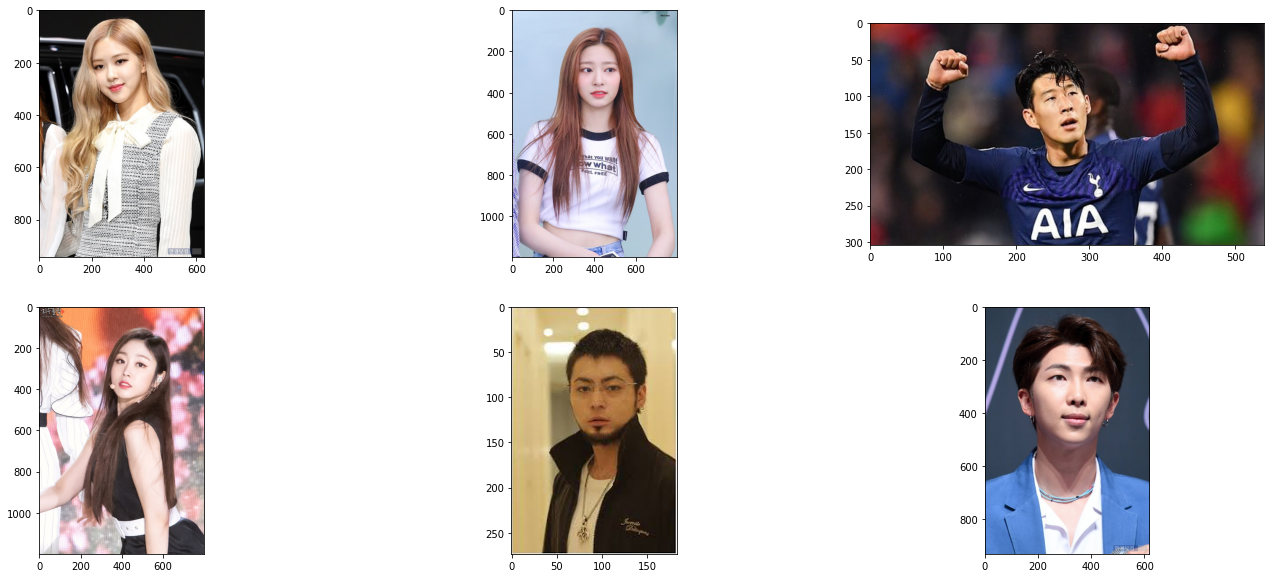

In [207]:
dir_path = os.getenv('HOME')+'/aiffel/face_embedding1/pic'


file_list = os.listdir(dir_path)
print ("file_list: {}".format(file_list))

#Set figsize here
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(24,10))

# flatten axes for easy iterating
for i, ax in enumerate(axes.flatten()):
    image = img.imread(dir_path+'/'+file_list[i])
    ax.imshow(image)
plt.show()

fig.tight_layout()

# 4. 얼굴영역 자르기

In [208]:
# 이미지 파일경로만 파라미터로 넘기면 얼굴영역만 잘라서 뿌려주는 함수

def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    
    
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]
  
    
    return cropped_face

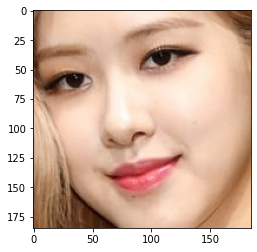

In [209]:
image_path = os.getenv('HOME')+'/aiffel/face_embedding1/pic/로제.jpg'

cropped_face = get_cropped_face(image_path)
plt.imshow(cropped_face)

# 5. 얼굴 영역의 임베딩 추출하기

In [210]:
image_file = os.path.join(dir_path, '로제.jpg')
face = get_cropped_face(image_file)   # 얼굴 영역을 구하는 함수(이전 스텝에서 구현)

# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(face)  
embedding

[array([-0.08441903, -0.00607559,  0.01659813, -0.13707486, -0.08958211,
         0.03906369, -0.10279097, -0.07765457,  0.1389565 , -0.20486183,
         0.1856847 , -0.11274761, -0.22265181, -0.01708237, -0.07869962,
         0.2338821 , -0.14161277, -0.12032852, -0.00599606,  0.00695278,
         0.07311858,  0.0298987 , -0.0328706 ,  0.11723086, -0.07633666,
        -0.27985984, -0.07208154, -0.03544039, -0.08141069, -0.0977859 ,
        -0.05283388,  0.0221178 , -0.16324149,  0.06133476, -0.01153742,
         0.14390975,  0.00246358, -0.11133584,  0.11918673,  0.05122419,
        -0.25179091,  0.03479407,  0.03987488,  0.19314072,  0.13951348,
         0.02801459, -0.06276821, -0.18254577,  0.12201881, -0.24245006,
         0.03478386,  0.1070209 ,  0.0277982 ,  0.03035517, -0.00183458,
        -0.13119085,  0.0699794 ,  0.14179188, -0.15564971,  0.02619371,
         0.06397402, -0.06119053,  0.02583209, -0.11317669,  0.22253385,
         0.15796842, -0.11985442, -0.20318352,  0.1

In [211]:
# 디렉토리 안에 있는 모든 이미지의 임베딩 딕셔너리를 구하는 함수
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    cropped_dict = {}
    for file in file_list:
        #제대로 인식이 되지않는 이미지가 있을 수 있어 예외처리함
        try:         
            img_path = os.path.join(dir_path, file)
            face = get_cropped_face(img_path)
            embedding = get_face_embedding(face)
            if len(embedding) > 0:  
            # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
            # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담긴다. 
                embedding_dict[os.path.splitext(file)[0]] = embedding[0]
                cropped_dict[os.path.splitext(file)[0]] = face
        except:
            continue


    return embedding_dict,cropped_dict


In [212]:
embedding_dict, cropped_dict = get_face_embedding_dict(dir_path)

In [213]:
embedding_dict

{'로제': array([-0.10781439,  0.02918936,  0.01980607, -0.12907138, -0.12005379,
        -0.02743125, -0.0770693 , -0.09804036,  0.12573534, -0.18269879,
         0.19765005, -0.12566739, -0.1916666 , -0.017181  , -0.06205684,
         0.2064257 , -0.19899617, -0.09827444, -0.02087888,  0.01134744,
         0.10065625,  0.00189982, -0.01314391,  0.07472398, -0.03033028,
        -0.32319787, -0.10857783, -0.01751466, -0.01442864, -0.09656007,
        -0.04138453,  0.03949669, -0.17576319, -0.01074842,  0.00299891,
         0.1438162 , -0.00390265, -0.1149292 ,  0.10405838,  0.00207329,
        -0.23151471,  0.03401775,  0.06009994,  0.1936567 ,  0.17436424,
         0.04522491, -0.02707249, -0.17507556,  0.10502739, -0.1857262 ,
         0.02980895,  0.09511314,  0.02966399,  0.04847433,  0.00134208,
        -0.13885473,  0.05508307,  0.13280848, -0.14071099,  0.00370304,
         0.12313548, -0.05558144,  0.02319786, -0.11885169,  0.22734563,
         0.1233708 , -0.11984516, -0.216720

# 6. 연예인 사진과 비교하기 전 내사진 2장으로 먼저 비교해보기

In [214]:
#두 이미지(사람 이름) 사이의 임베딩 벡터 거리를 구하는 함수
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

get_distance('myimg01', 'myimg3') #내사진 비교

0.27541709593967506

###  - 꽤 낮게 나오는걸 보니 동일인물이라고 인식을 하고 있음을 알 수 있음

# 7. 연예인 사진으로 닮은꼴 찾기

In [215]:
# name1과 name2거리 비교하는 함수
# name1과 name2의 거리를 비교하는 함수를 생성하되, name1은 미리 지정하고, name2는 호출시에 인자로 받도록 함
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1


In [216]:
def get_nearest_face(name, top=6):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    plt.figure(figsize=(5, 10))
    for i in range(top+1):
        if i <= 1 :
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i-1, sorted_faces[i][0], get_distance(name, sorted_faces[i][0])))

In [217]:
#닮은 연예인 이미지 출력하기
sorted_faces = get_nearest_face('myimg01')

순위 1 : 이름(아이유), 거리(0.3013272002242429)
순위 2 : 이름(손나은), 거리(0.3397261382416838)
순위 3 : 이름(트와이스미나), 거리(0.3437549514159476)
순위 4 : 이름(트와이스나연), 거리(0.34503257891996253)
순위 5 : 이름(강미나), 거리(0.36200627634142296)


<Figure size 360x720 with 0 Axes>

# 8. 다양한 재미있는 시각화 시도해 보기

## * 이미지 합쳐보기

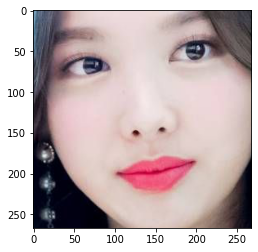

In [229]:
import numpy as np 
from PIL import Image


fir_path = os.getenv('HOME')+'/aiffel/face_embedding1/pic/트와이스나연.jpg'
fir_pil = Image.open(fir_path) 
fir_image = np.array(fir_pil)
cropped_face1 = get_cropped_face(fir_path)
plt.imshow(cropped_face1) 
plt.show()


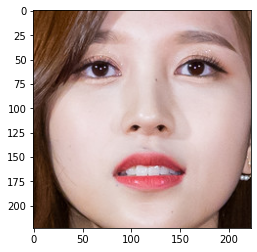

In [230]:
sec_path = os.getenv('HOME')+'/aiffel/face_embedding1/pic/트와이스미나.jpg'
sec_pil = Image.open(sec_path) 
sec_image = np.array(sec_pil)
cropped_face2 = get_cropped_face(sec_path)
plt.imshow(cropped_face2) 
plt.show()

In [237]:
#내사진
third_path = os.getenv('HOME')+'/aiffel/face_embedding1/pic/myimg01.png'
third_pil = Image.open(third_path) 
third_image = np.array(third_pil)
cropped_face3 = get_cropped_face(third_path)
#plt.imshow(cropped_face3) 
#plt.show()

In [238]:
#이미지 shape확인
cropped_face1.shape, cropped_face2.shape, cropped_face3.shape

((223, 223, 3), (223, 223, 3), (555, 555, 3))

### 이미지 합치기 전 이미지 크기조절

In [234]:
# 이미지 합치기 
import cv2 
cropped_face1 = cv2.resize(cropped_face1, (223,223))# 지금은 같은 크기이지만 다르다면 반대로 써야한다. 
cropped_face3 = cv2.resize(cropped_face3, (223,223))
cropped_face1.shape # 이미지 변경 완료 
cropped_face3.shape
print("shape : ", cropped_face1.shape, cropped_face2.shape, cropped_face3.shape)

shape :  (223, 223, 3) (223, 223, 3) (223, 223, 3)


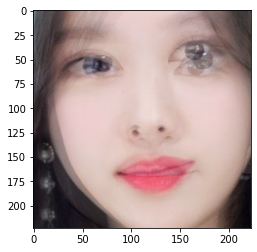

In [236]:
# 세 이미지 합쳐서 출력 
plt.imshow(cropped_face1) 
plt.imshow(cropped_face2, alpha=0.3) # 투명도를 안주면 겹쳐서 안보인다. 
plt.imshow(cropped_face3, alpha=0.3)
plt.show()


## 루브릭

|평가문항|상세기준|
|:-------------------------------------------------------|:----------------------------------------------------------|
|1. 얼굴임베딩 벡터를 활용해 가장 닮은 연예인 Best 5를 구할 수 있다. | 닮은꼴 순위, 이름, 임베딩 거리를 포함한 Top-5 리스트가 정렬되어 출력되었다.|
|2. 충분한 수의 이미지에 대한 시도를 통해 매우 닮은꼴의 연예인을 찾아냈다.|다양한 탐색을 통해 본인과 임베딩 거리 0.5 이내로 닮은 연예인을 찾아냈다.|
|3. 다양하고 재미있는 결과 시각화를 시도하였다.           |matplotlib 등 다양한 시각화 도구를 하나 이상 이용해 재미있는 결과 시각화를 구현하였다.|

1번 문항 : 닮은꼴 순위, 이름, 임베딩 거리를 포함한 top-5리스트가 정렬되어 출력됨   

2번 문항 : 모두 임베딩 거리 0.5이내로 닮은 연예인을 찾아냄    

3번 문항 : 본인 이미지와 다른 이미지들을 크기를 같게해 합쳐보며 시각화해봄

# 회고

#### 처음에 자기 사진으로 비교할 때와 연예인들 사진을 넣고 비교할 때의 폴더를 각각 다르게 해서 진행을 했었다.
#### 그랬더니 마지막에 순위 나오는 부분에서 거리가 다 0이 나왔었다.    
#### 많은 분들이 도움을 주셔서 계속 코드 수정을 하면서 실행을 해봤지만 key error도 뜨고 결국에 안돼서 아예 내사진 2장도 같이 한 폴더에 넣고 진행을 했고    
#### 불필요한 부분들을 지우고 순서도 정리해서 먼저 닮은꼴찾는 부분부터 결과가 잘 나오도록 했다.     
#### 그런 후에 마지막에 자기사진끼리 비교하는 부분을 완성했다.
#### 아직도 key error는 왜 떴는지 이해가 되지 않는다.    분명히 이미지 폴더안에 다 들어가 있는 걸 확인 했는데도 불구하고 계속 에러가 났다.
#### 혹시나 해서 파일 명도 한글에서 영어로 바꾸기도 하면서 변화를 줘봤지만 여전히 에러가 났고 결국에 다시 다 지우고 폴더를 다시 업로드해서 해봤더니 실행이 됐다.
#### file_list에서 파일명을 직접 복사해서 넣으면 실행이 된다고 하시는 분도 계셨었는데 나는 그 방법이 적용이 되지 않아서 실패했다. 그 부분은 좀 더 공부를 해봐야 될 것 같다.
#### 그리고 마지막에 이미지들을 합쳐보는걸 진행할 때 top5이미지들과 내이미지들을 모두 합쳐보려고 했지만 몇몇 이미지들이 디렉토리경로가 잘못되었다고 나와
#### 일부 이미지들만 합쳐보는것을 진행했다. 모든 이미지가 지정된 경로폴더안에 들어있는 것을 확인했지만 불러오지 못했고 제출이후에도 불러오지 못한 이미지들을 불러오도록 해봐야겠다.
#### 오래걸리지 않을 줄 알았는데 예상밖의 에러들로 쉽지가 않았다.